In [1]:
datapath_big = "/data/yutaro/IROS/sim_data_full_v11_d4_m1.mat"
datapath_small = "/data/yutaro/IROS/sim_data_partial_v111_d4_m1.mat"

In [2]:
import scipy.io as sio
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import animation

In [3]:
small = sio.loadmat(datapath_small)

In [4]:
print(small.keys())

dict_keys(['__header__', '__version__', 'is_end', 'is_start', 'D', '__globals__'])


In [5]:
small['D'].shape

(83888, 10)

In [11]:
small['is_start']

array([[1]])

In [6]:
big = sio.loadmat(datapath_big)

In [13]:
big['D'].shape

(1616064, 10)

In [7]:
df_big = pd.DataFrame(big['D'])

In [31]:
print(np.min(big['D'][:,0]))
print(np.max(big['D'][:,0]))
print(np.min(big['D'][:,1]))
print(np.max(big['D'][:,1]))

-89.60562199354172
90.1498943567276
43.401654809713364
140.1200145483017


In [8]:
df_big.head()

,0,1,2,3,4,5,6,7,8,9
0,0.426909,118.443377,16.000000,16.000000,0.0,0.0,0.418931,118.442513,16.030001,16.030001
1,0.418931,118.442513,16.030001,16.030001,1.0,1.0,0.404663,118.443087,16.030001,16.030001
2,0.404663,118.443087,16.030001,16.030001,1.0,1.0,0.396586,118.443348,16.060001,16.060001
3,0.396586,118.443348,16.060001,16.060001,1.0,1.0,0.391399,118.442141,16.060001,16.060001
4,0.391399,118.442141,16.060001,16.060001,1.0,1.0,0.384889,118.439220,16.090002,16.090002


In [53]:
print(np.max(big['D'][:,5])) 

1.0


In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

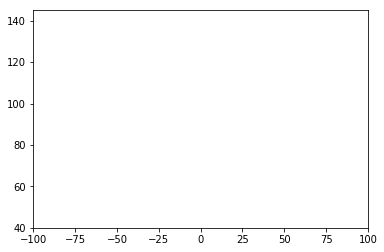

In [37]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -100, 100))
ax.set_ylim((40, 145))

line, = ax.plot([], [], lw=2)


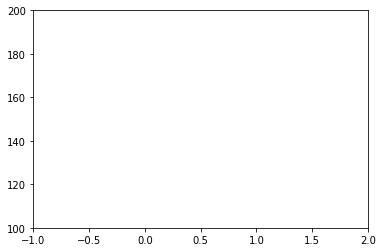

In [42]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -1, 2))
ax.set_ylim((100, 200))

line, = ax.plot([], [], lw=2)


In [43]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [44]:
# animation function. This is called sequentially
def animate(i):
    x = big['D'][i,0] #np.linspace(0, 2, 1000)
    y = big['D'][i,1] #        # np.sin(2 * np.pi * (x - 0.01 * i)) 
    line.set_data(np.array([x]), np.array([y])) 
    return (line,)

In [45]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)  

In [46]:
anim.save('colour_rotation.gif', dpi=80, writer='imagemagick')
plt.close() 